This other notebook use [Scilab](http://www.scilab.org/en/), a free clone of MATLAB.

# Iterative computation example (signal filtering)

This short Scilab example is meant to show how Julia can be very fast with iterative computations (e.g. `for` loops), thanks to JIT compilation.

Outline:

1. An example of iterative computation: exponential smoothing
2. How to measure the performance of a program using `tic`, `tac` macro

## A simple iterative computation: Exponential smoothing

[Exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing) (also known as "exponentially weighted moving average", "1st order Autoregressive filter", "1st order IIR filter" in signal processing) is a simple recursive filter which can smooth a times series $\{u_k\}_{k\in\mathbb{N}}$:

$$ y_k = ay_{k-1} + (1-a) u_k, \;\;\;\; k\in\mathbb{N}^+, a\in[0,1[$$

Parameter $a$ tunes the smoothing, between none ($a=0$) and strong smoothing ($a\to1^-$).

This is a simple example of a computation that **cannot be vectorized**. Therefore, iteration in a `for` loop cannot be avoided.

### Example data

A kind of random walk, 1000 pts

In [1]:
rand("seed", 0)
rand("normal")

In [2]:
u = cumsum(rand(1000,1))

-0.7616491
-0.0860953
1.3878809
2.532186
3.3851636
3.8381345
4.560466
6.4877992
7.1258829
6.2759935
6.5306631
4.9889423
4.3055206
3.5845672
4.3990799
4.723096
4.5346158
4.9587768
3.926041
3.2480738
2.324148
0.9367403
3.6634084
2.951095
1.2424176
2.1944483
2.2643251
-0.6115874
-1.9888718
-1.1973562
-1.3701931
-0.6072848
-1.2092717
-1.2332172
-2.7951692
-3.3588857
-3.7477512
-4.407225
-3.7529205
-4.4302271
-5.1306757
-4.7953369
-5.6215602
-5.1521268
-4.0197358
-4.3307149
-4.563728
-3.5896054
-3.8239977
-4.0061914
-2.6034303
-0.5714236
-0.2445523
0.4441462
0.5054994
-1.6839223
-1.8729749
-1.1641001
-0.7391152
-0.8872727
-1.6333717
-0.2247098
-1.9458128
-1.9505094
-3.6662677
-3.4820342
-3.3797321
-4.413025
-5.6988856
-5.1017692
-4.4909908
-5.5477772
-5.9255954
-4.7799781
-2.2050676
-2.7056229
-3.1631513
-2.6008362
-3.2461623
-3.6109457
-3.5993066
-3.376033
-4.8104803
-3.0740982
-1.3253623
0.5398169
0.7044081
-0.3314829
0.5867378
-0.3488107
-0.3228988
-0.0508584
0.7445119
-0.936655
-2.31371

-57.663925
-58.553535
-59.547463
-59.622823
-59.313352
-61.123248
-62.151172
-61.170891
-61.910839
-62.426481
-61.58934
-61.909968
-62.277894
-62.779144
-62.208569
-63.23355
-61.475475
-61.43853
-60.416428
-60.269647
-61.580845
-62.022148
-62.435719
-60.580155
-63.090461
-63.129761
-61.746367
-62.0717
-61.688562
-60.346459
-60.830026
-59.869201
-60.395982
-60.550344
-60.098791
-61.415191
-60.371715
-60.431373
-59.996506
-59.259596
-57.870446
-57.798257
-56.531981
-55.559378
-53.776304
-53.696003
-54.421227
-55.349818
-54.711675
-53.008808
-52.119257
-54.125491
-53.626966
-54.321561
-55.858661
-57.187523
-57.780917
-57.609121
-56.755559
-57.894177
-58.080295
-56.973536
-56.768299
-55.435262
-55.444722
-55.887192
-55.083805
-55.961674
-56.656755
-57.127774
-57.518617
-56.029474
-55.100495
-55.398255
-56.950733
-57.848058
-58.239116
-57.981508
-57.731215
-56.362809
-56.299426
-57.498748
-56.951929
-58.469215
-56.204352
-57.960905
-56.912234
-55.183353
-55.204451
-55.079889
-55.976458
-54.

In [3]:
length(u)

1000.


### A SciLab implemenation of the smoothing

In [4]:
function y = smooth(u, a)
    y = zeros(length(u),1);
    
    y(1) = (1-a)*u(1);
    for k=2:length(u)
        y(k) = a*y(k-1) + (1-a)*u(k);
    end
end

In [5]:
smooth(u, 0.9)

-0.0761649
-0.077158
0.0693459
0.3156299
0.6225833
0.9441384
1.3057712
1.823974
2.3541649
2.7463477
3.1247793
3.3111956
3.4106281
3.428022
3.5251278
3.6449246
3.7338937
3.856382
3.8633479
3.8018205
3.6540533
3.382322
3.4104306
3.364497
3.1522891
3.056505
2.977287
2.6183996
2.1576725
1.8221696
1.5029333
1.2919115
1.0417932
0.8142922
0.453346
0.0721228
-0.3098646
-0.7196006
-1.0229326
-1.363662
-1.7403634
-2.0458608
-2.4034307
-2.6783003
-2.8124439
-2.964271
-3.1242167
-3.1707555
-3.2360798
-3.3130909
-3.2421249
-2.9750547
-2.7020045
-2.3873894
-2.0981005
-2.0566827
-2.0383119
-1.9508907
-1.8297132
-1.7354691
-1.7252594
-1.5752044
-1.6122653
-1.6460897
-1.8481075
-2.0115001
-2.1483233
-2.3747935
-2.7072027
-2.9466594
-3.1010925
-3.345761
-3.6037444
-3.7213678
-3.5697378
-3.4833263
-3.4513088
-3.3662615
-3.3542516
-3.379921
-3.4018596
-3.3992769
-3.5403973
-3.4937673
-3.2769268
-2.8952525
-2.5352864
-2.3149061
-2.0247417
-1.8571486
-1.7037236
-1.5384371
-1.3101422
-1.2727935
-1.3768858
-1

-57.929084
-58.090922
-58.244112
-58.351036
-58.628257
-58.980549
-59.199583
-59.470708
-59.766286
-59.948591
-60.144729
-60.358045
-60.600155
-60.760996
-61.008252
-61.054974
-61.09333
-61.02564
-60.95004
-61.013121
-61.114023
-61.246193
-61.179589
-61.370676
-61.546585
-61.566563
-61.617077
-61.624225
-61.496449
-61.429806
-61.273746
-61.185969
-61.122407
-61.020045
-61.05956
-60.990776
-60.934835
-60.841002
-60.682862
-60.40162
-60.141284
-59.780353
-59.358256
-58.800061
-58.289655
-57.902812
-57.647513
-57.353929
-56.919417
-56.439401
-56.20801
-55.949905
-55.787071
-55.79423
-55.933559
-56.118295
-56.267378
-56.316196
-56.473994
-56.634624
-56.668515
-56.678494
-56.55417
-56.443226
-56.387622
-56.25724
-56.227684
-56.270591
-56.356309
-56.47254
-56.428233
-56.295459
-56.205739
-56.280238
-56.43702
-56.61723
-56.753658
-56.851414
-56.802553
-56.75224
-56.826891
-56.839395
-57.002377
-56.922574
-57.026407
-57.01499
-56.831826
-56.669089
-56.510169
-56.456798
-56.264256
-55.949624
-5

### Plot, to check that things work properly

In [6]:
a = 0.95

0.95


In [7]:
x = 1:length(u);

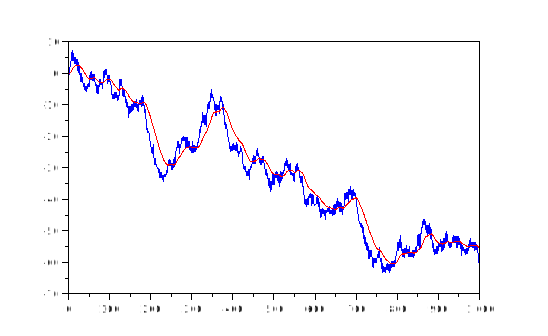

In [8]:
plot(x, u, 'b')
plot(x, smooth(u, a), 'r')

## Performance analysis

With `tic()` and `toc()` like in Matlab.

In [8]:
tic();
smooth(u, 0.9);
toc()

0.110624


Since this time is too short to be meaningful, let's use more points (1M):

In [18]:
rand("seed", 0);
u = cumsum(rand(1e7,1));

In [19]:
length(u)

10000000.


In [20]:
tic();
smooth(u, 0.9);
toc()

18.884882


10 Mpts take **~70 ms** to compute, which means ~ 150 Mpts/s

In [40]:
1e7/70e-3/1e6

142.85714285714283